# Compare cleaning methods for each modality

Cleaning : preparing signals for processing and confounds for fmri.

#### Dependencies

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import neurokit2 as nk2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pylab inline
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = (12.0, 6.0)  
plt.rcParams.update({'font.size': 14})

Populating the interactive namespace from numpy and matplotlib


#### import some code

In [4]:
%run ./code/conversion/test/convert_seg2hdf.py

In [5]:
%run code/utils/get_info.py -h

usage: get_info.py [-h] [-indir ROOT] [-sub SUB] [-ses SES] [-show SHOW]
                   [-save SAVE]

Required Argument::
  -indir ROOT, --input-directory ROOT
                        Specify root directory of dataset
  -sub SUB, --subject SUB
                        Specify alongside "-heur". Code of subject to process.

optional arguments:
  -h, --help            show this help message and exit
  -ses SES, --session SES
                        Specify alongside "-heur". Code of session to process.
  -show SHOW, --show-dict SHOW
                        Specify if you want to print dictionary
  -save SAVE, --save-dict SAVE
                        Specify if you want to save the dictionary


# Segmentation and Conversion
Make a list of files for a single subject and cut it



In [6]:
ls = list_sub('/data/neuromod/DATA/cneuromod/movie10/sourcedata/physio', sub='sub-06', show=True)

list of files for session ses-001 ['neuromod_video52019-08-09T10_04_28.acq']
list of files for session ses-002 ['neuromod_video52019-08-20T14_52_12.acq']
list of files for session ses-003 ['neuromod_video52019-08-22T15_10_50.acq']
list of files for session ses-004 ['neuromod_video52019-08-22T16_32_03.acq']
list of files for session ses-005 ['neuromod_video52019-08-27T15_11_57.acq', 'neuromod_video52019-08-27T14_24_33.acq']
list of files for session ses-006 ['neuromod_video52019-08-30T11_04_12.acq', 'neuromod_video52019-08-30T09_54_37.acq']
list of files for session ses-007 ['neuromod_video52019-09-06T13_27_27.acq']
list of files for session ses-008 ['neuromod_video52019-09-17T15_24_42.acq']
list of files for session ses-009 ['neuromod_video52019-09-19T13_11_23.acq']
list of files for session ses-010 ['neuromod_video52019-09-20T14_19_07.acq', 'neuromod_video52019-09-20T13_25_02.acq']


sub-06_ses-009_task-run01 in file  neuromod_video52019-09-19T13_11_23.acq 
in experiment: ses-009 is parsed. 
and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-06_ses-009_task-run02 in file  neuromod_video52019-09-19T13_11_23.acq 
in experiment: ses-009 is parsed. 
and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-06_ses-009_task-run03 in file  neuromod_video52019-09-19T13_11_23.acq 
in experiment: ses-009 is parsed. 
and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-06_ses-009_task-run04 in file  neuromod_video52019-09-19T13_11_23.acq 
in experiment: ses-009 is parsed. 
and saved at /home/francois.lespinasse/physiological-signals/tests/conversion/ | sampling rate is : 10000.0 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~

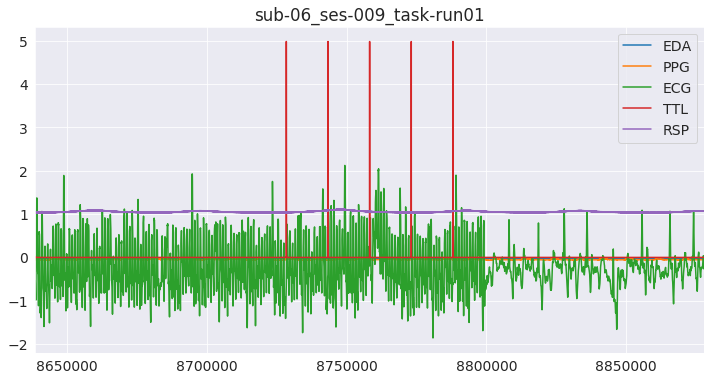

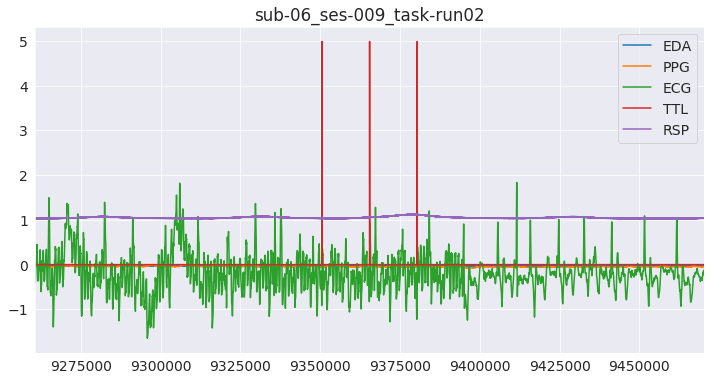

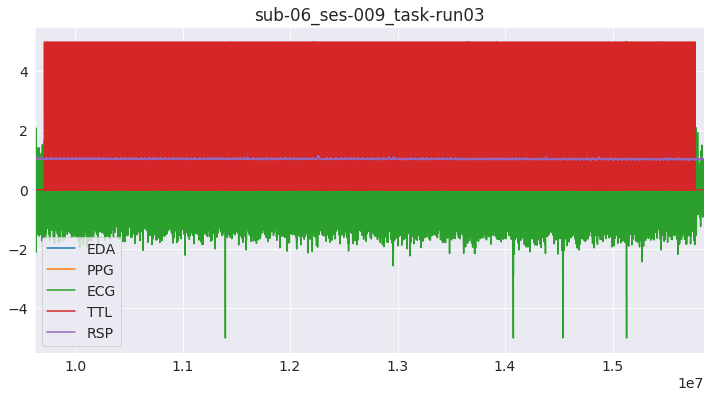

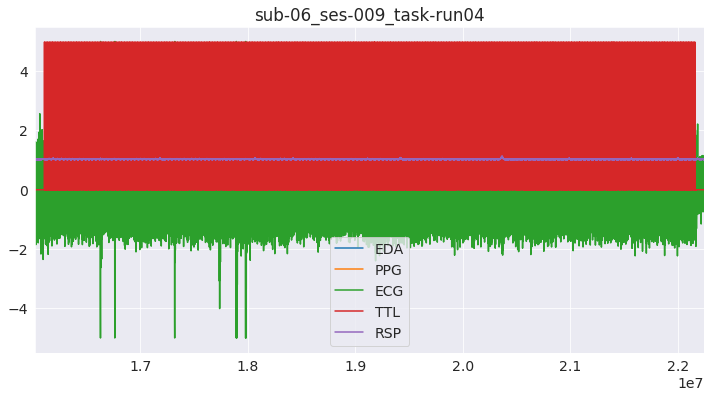

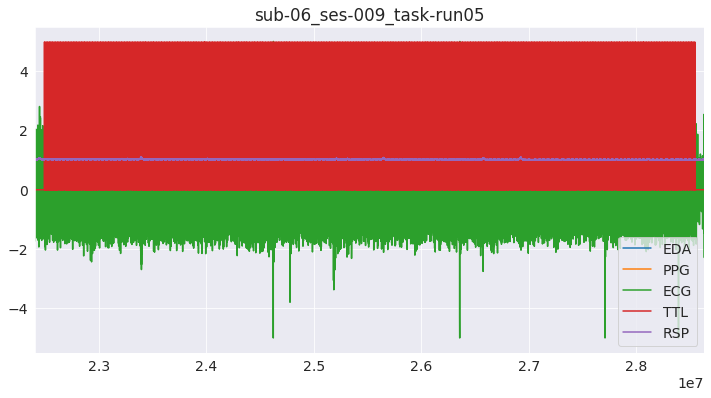

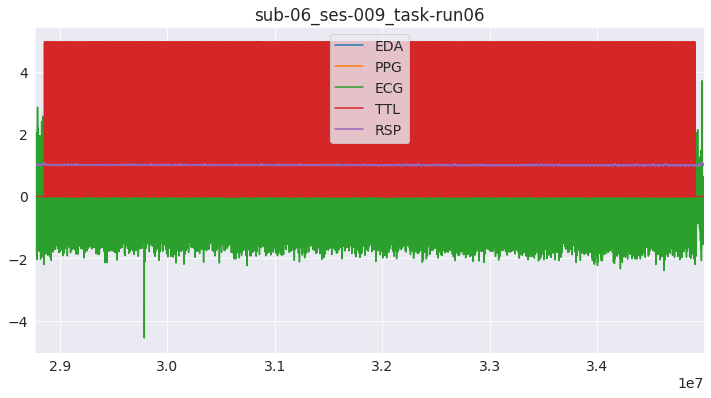

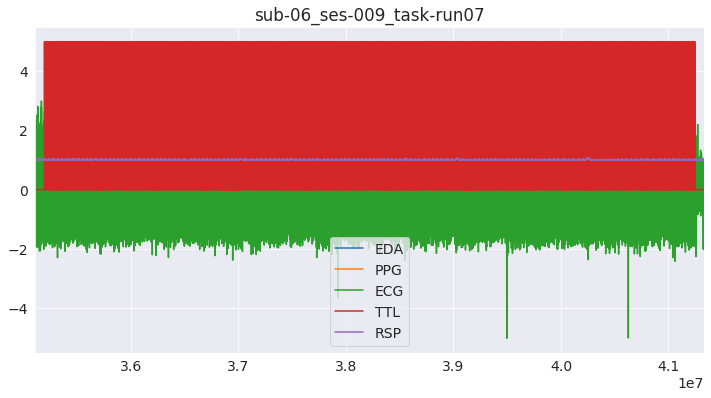

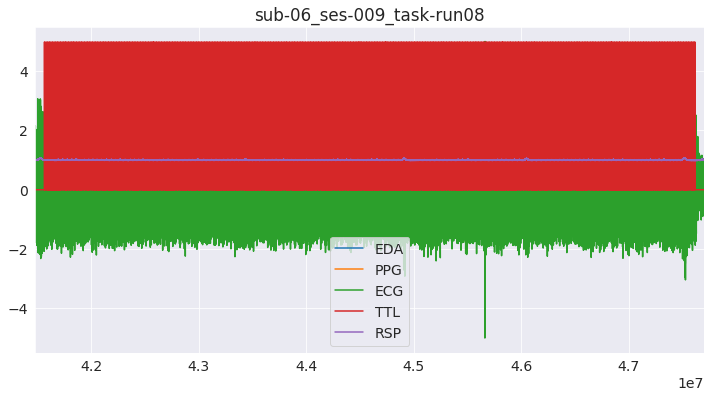

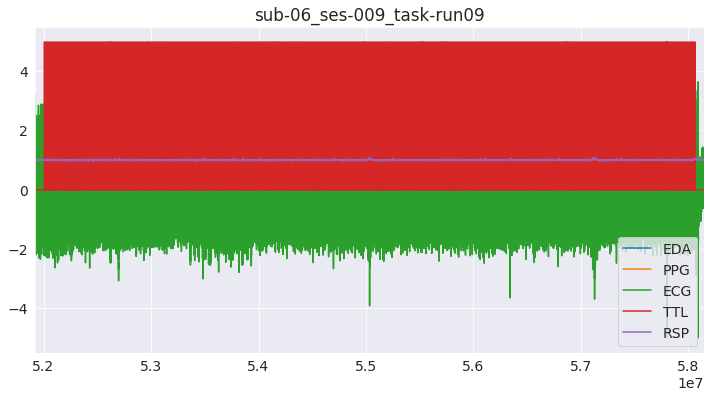

In [8]:
files = batch_parse("/data/neuromod/DATA/cneuromod/movie10/sourcedata/physio", subject='sub-06', ses='ses-009', save_path="/home/francois.lespinasse/physiological-signals/tests/conversion/")

### Plot are saved along with the files
let's look at a run

In [9]:
bio_df = pd.read_hdf('/home/francois.lespinasse/physiological-signals/tests/conversion/sub-06/ses-009/sub-06_ses-009_task-run08.h5', key='bio_df')

In [10]:
fs = pd.read_hdf('/home/francois.lespinasse/physiological-signals/tests/conversion/sub-03/ses-010/sub-03_ses-010_task_run03.h5', key='sampling_rate')

In [11]:
fs = int(fs)

In [12]:
bio_df.keys()

Index(['EDA', 'PPG', 'ECG', 'TTL', 'RSP'], dtype='object')

In [13]:
time = np.arange(len(bio_df))/fs

# PREPROCESSING

# EDA

Text(0, 0.5, 'µSiemens')

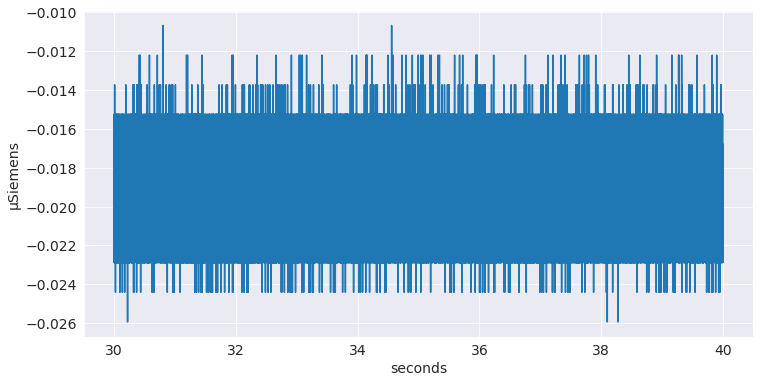

In [14]:
eda_raw = bio_df['EDA']
plt.plot(time[300000:400000], eda_raw[300000:400000])
plt.xlabel("seconds")
plt.ylabel("µSiemens")

## BioSPPy cleaning method specs
* Lowpass - 5Hz (normalized freq)

* Butterworth

* order 4

* smoothing convolution with boxzen kernel and window size of 0.75 * sampling_rate

In [276]:
eda_clean_biosppy = nk2.eda_clean(eda_raw, fs, method='biosppy')

Text(0, 0.5, 'µSiemens')

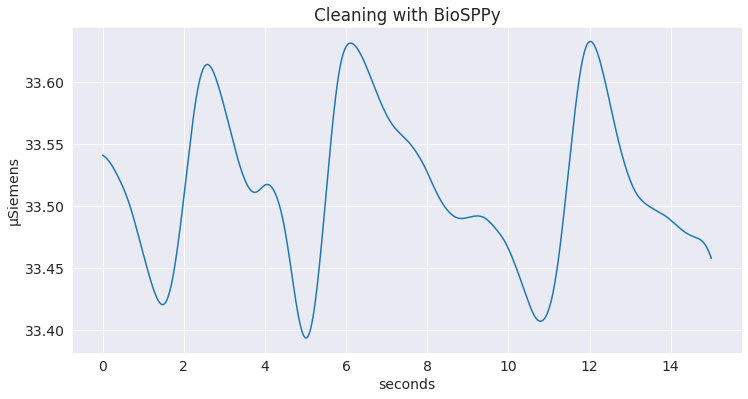

In [277]:
plt.plot(time[:150000], eda_clean_biosppy[:150000])
plt.title('Cleaning with BioSPPy')
plt.xlabel("seconds")
plt.ylabel("µSiemens")

## Neurokit EDA cleaning methods specs
* hightcut - 3Hz

* Butterworth

* order 4

* no convolution

In [278]:
eda_clean_nk = nk2.eda_clean(eda_raw, fs, method='neurokit')

Text(0, 0.5, 'µSiemens')

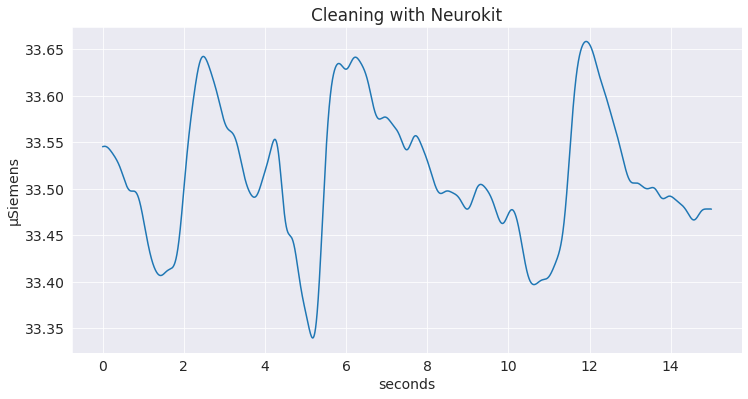

In [279]:
plt.plot(time[:150000], eda_clean_nk[:150000])
plt.title('Cleaning with Neurokit')
plt.xlabel("seconds")
plt.ylabel("µSiemens")

### Process with neurokit default pipeline

``clean - find_peaks - fix_peaks - compute measures of interest`` 

In [280]:
eda_proc, eda_info = nk2.eda_process(np.array(bio_df['EDA']), sampling_rate=fs)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

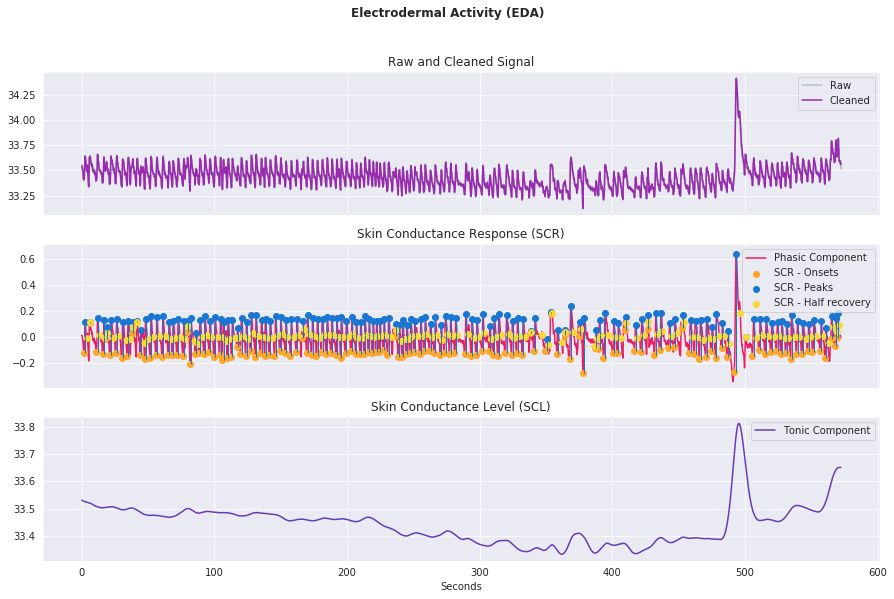

In [262]:
eda_fig = nk2.eda_plot(eda_proc, sampling_rate=fs)

In [16]:
eda_info.keys()

dict_keys(['SCR_Onsets', 'SCR_Peaks', 'SCR_Height', 'SCR_Amplitude', 'SCR_RiseTime', 'SCR_Recovery', 'SCR_RecoveryTime'])

In [292]:
print('Skin conductance response happens on average, once every ',60/(len(eda_info['SCR_Peaks'])/10), 's')

Skin conductance response happens on average, once every  4.316546762589928 s


### Downsample
250 Hz

In [81]:
eda_down = nk2.signal_resample(eda_clean, sampling_rate=fs, desired_sampling_rate=250, method='interpolation')

Text(0, 0.5, 'µSiemens')

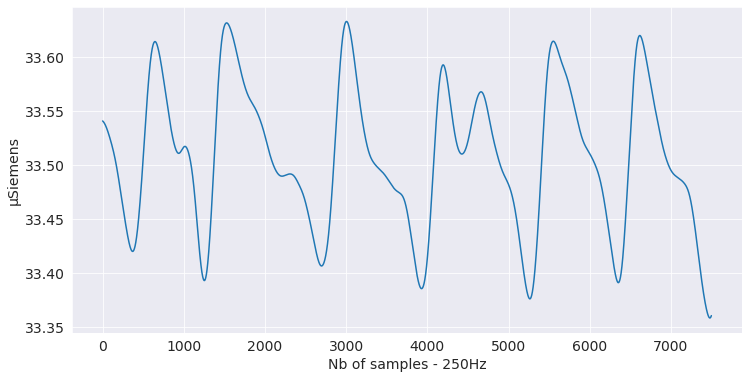

In [82]:
plt.plot(eda_down[:7500])
plt.xlabel("Nb of samples - 250Hz")
plt.ylabel("µSiemens")

# RSP

Text(0, 0.5, 'Volts')

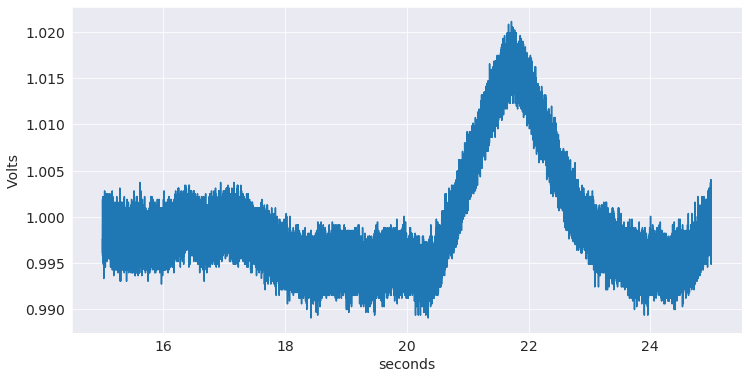

In [15]:
plt.plot(time[150000:250000], bio_df['RSP'][150000:250000])

plt.xlabel("seconds")
plt.ylabel("Volts")

## RSP clean - Khodadad2018
Remove baseline by applying a lowcut at .05Hz (preserves breathing rates higher than 3 breath per minute) and high frequency noise by applying a highcut at 3 Hz (preserves breathing rates slower than 180 breath per minute).

In [16]:
rsp_clean_kho = nk2.rsp_clean(bio_df['RSP'], sampling_rate=fs, method='khodadad2018')

Text(0, 0.5, 'Volts')

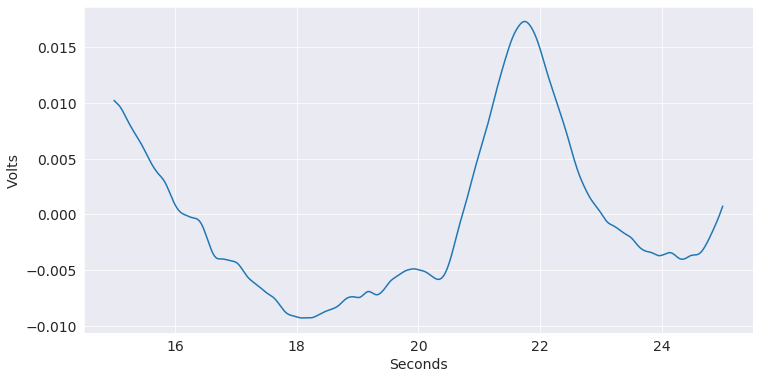

In [17]:
plt.plot(time[150000:250000],rsp_clean_kho[150000:250000])
plt.xlabel("Seconds")
plt.ylabel("Volts")

## RSP clean - BioSPPy's method
second order [0.1 - 0.35 Hz] 

bandpass Butterworth filter

constant detrending


[docs](https://github.com/neuropsychology/NeuroKit/blob/master/neurokit2/rsp/rsp_clean.py)

In [18]:
rsp_clean_biosppy = nk2.rsp_clean(bio_df['RSP'], sampling_rate=fs, method='biosppy')

Text(0, 0.5, 'Volts')

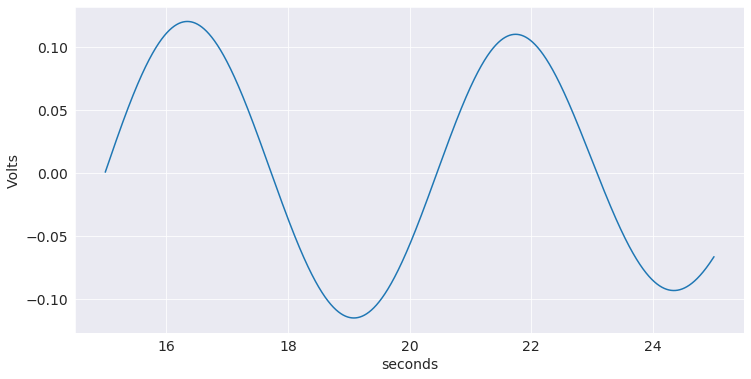

In [19]:
plt.plot(time[150000:250000], rsp_clean_biosppy[150000:250000])
plt.xlabel("seconds")
plt.ylabel("Volts")

In [20]:
rsp_proc, rsp_info = nk2.rsp_process(bio_df['RSP'], sampling_rate=fs, method='khodadad2018')

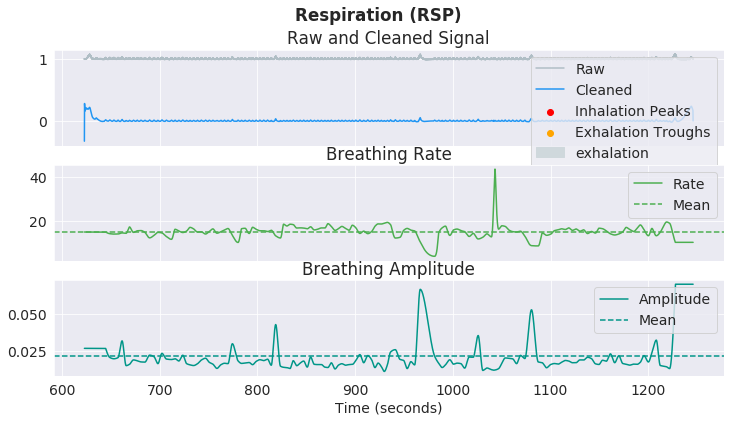

In [21]:
rsp_fig = nk2.rsp_plot(rsp_proc, sampling_rate=fs)

# PPG


Text(0, 0.5, 'Volts')

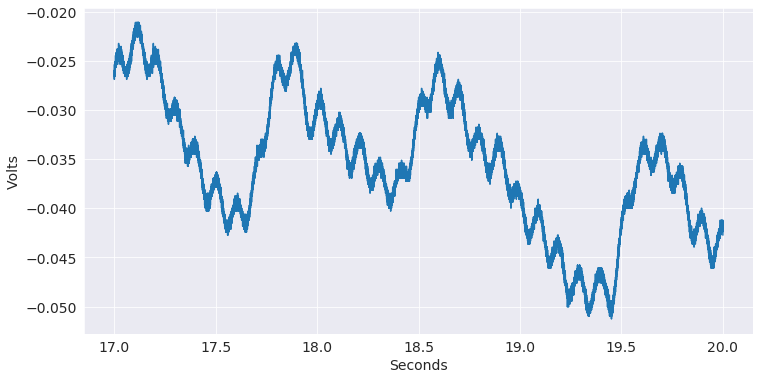

In [22]:
plt.plot(time[170000:200000], bio_df['PPG'][170000:200000])
plt.xlabel("Seconds")
plt.ylabel("Volts")

In [34]:
ppg_clean = nk2.ppg_clean(np.array(bio_df['PPG']), sampling_rate=fs, method='nabian2018')

In [39]:
ppg_clean2 = nk2.signal_filter(ppg_clean, sampling_rate=fs, lowcut=None, highcut=9, order=2, method="butterworth")

Text(0, 0.5, 'Volts')

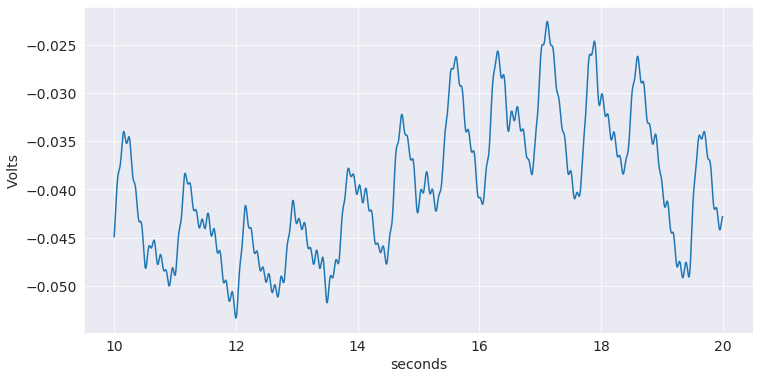

In [40]:
plt.plot(time[100000:200000], ppg_clean2[100000:200000])
plt.xlabel("seconds")
plt.ylabel("Volts")

In [41]:
ppg_sig, ppg_info = nk2.ppg_process(ppg_clean2, fs)

/home/francois.lespinasse/anaconda3/envs/biosigEnv/lib/python3.7/site-packages/neurokit2/ppg/ppg_findpeaks.py:105: RuntimeWarning: invalid value encountered in greater
  waves = ma_peak > thr1


IndexError: index 0 is out of bounds for axis 0 with size 0

# ECG

Text(0, 0.5, 'Volts')

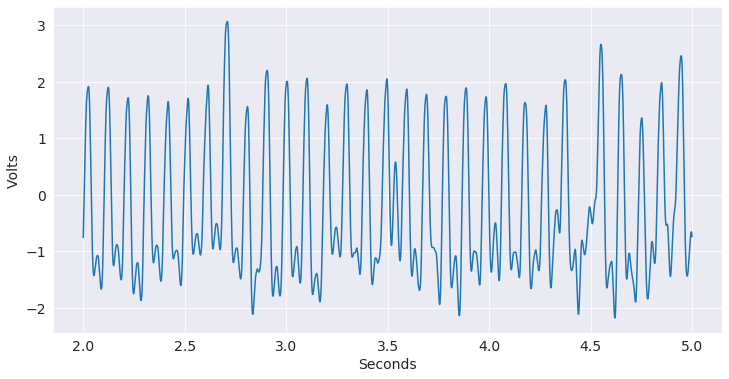

In [31]:
plt.plot(time[20000:50000], bio_df['ECG'][20000:50000])
plt.xlabel("Seconds")
plt.ylabel("Volts")

In [30]:
ecg = bio_df['ECG']

In [132]:
signals = pd.DataFrame({"ECG_Raw" : ecg,
"ECG_NeuroKit" : nk2.ecg_clean(ecg, sampling_rate=fs, method="neurokit"),
"ECG_BioSPPy" : nk2.ecg_clean(ecg, sampling_rate=fs, method="biosppy"),
"ECG_PanTompkins" : nk2.ecg_clean(ecg, sampling_rate=fs, method="pantompkins1985"),
"ECG_Hamilton" : nk2.ecg_clean(ecg, sampling_rate=fs, method="hamilton2002"),
"ECG_Elgendi" : nk2.ecg_clean(ecg, sampling_rate=fs, method="elgendi2010"),
"ECG_EngZeeMod" : nk2.ecg_clean(ecg, sampling_rate=fs, method="engzeemod2012")})

In [294]:
signals['time'] = time

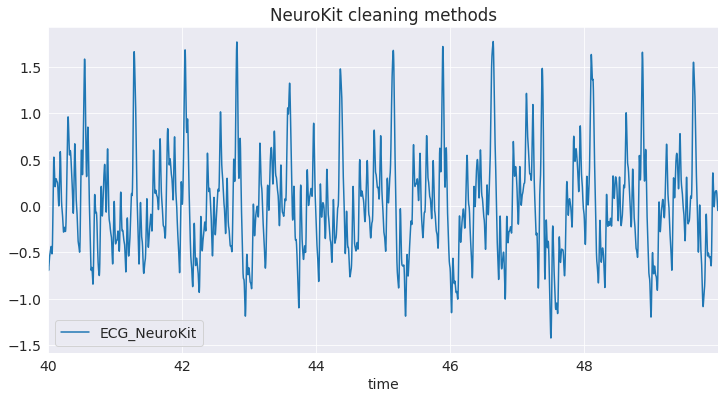

In [306]:
signals[['ECG_NeuroKit', 'time']][400000:500000].plot(title='NeuroKit cleaning methods', x='time')

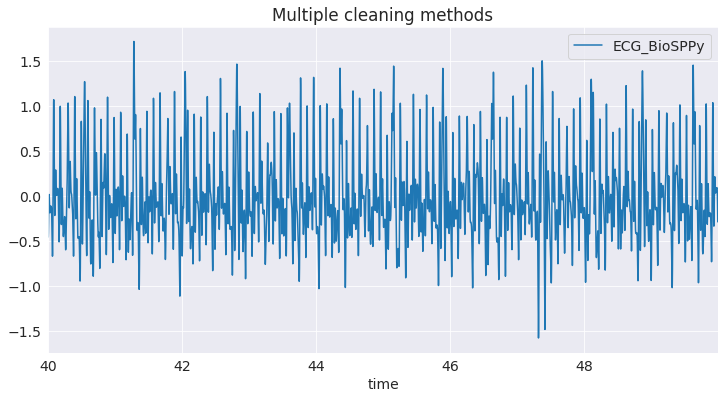

In [308]:
signals[['ECG_BioSPPy', 'time']][400000:500000].plot(title='BioSPPy cleaning methods', x="time")

In [232]:
cleaned=signals['ECG_NeuroKit'][400000:600000]

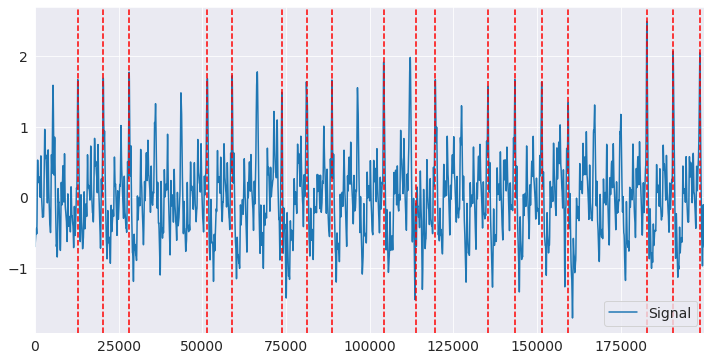

In [313]:
info = nk2.ecg_findpeaks(np.array(cleaned),sampling_rate=fs)
figs = nk2.events_plot(info["ECG_R_Peaks"], np.array(cleaned))

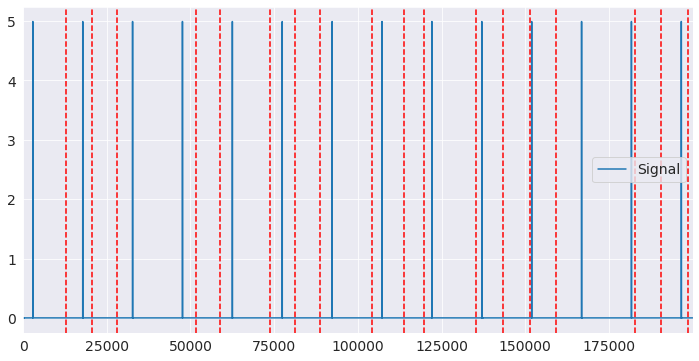

In [312]:
ecg_signals, info = nk2.ecg_peaks(np.array(cleaned), sampling_rate=fs, correct_artifacts=True)
figs = nk2.events_plot(info["ECG_R_Peaks"], np.array(bio_df['TTL'][400000:600000]))

In [203]:
pylab.rcParams['figure.figsize'] = (15.0, 9.0) 

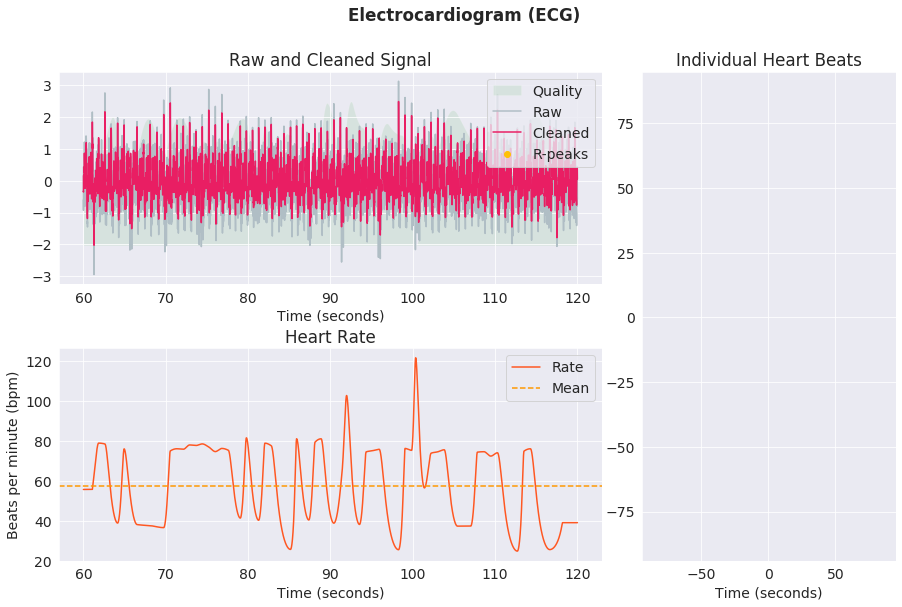

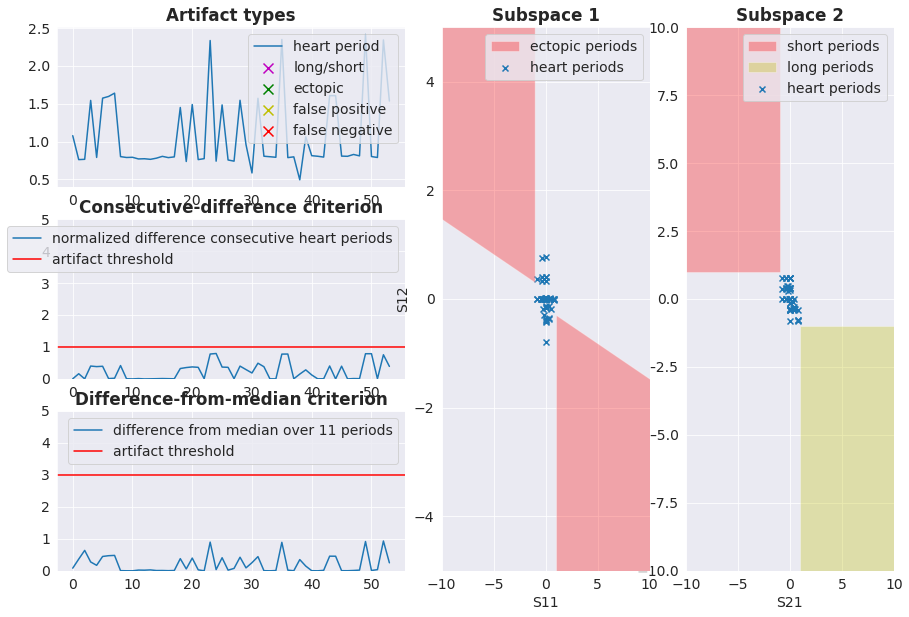

In [169]:
ecg_sig, info = nk2.ecg_process(ecg[200000:600000], sampling_rate=fs)
figs = nk2.ecg_plot(ecg_sig, sampling_rate=fs, show_type='full')

## Manually edit peak detection with Peakdet
![](https://peakdet.readthedocs.io/en/latest/_images/physio_edit.gif)